In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [3]:
train['습도(%)'] = train['습도(%)'].interpolate()
train['풍속(m/s)'] = train['풍속(m/s)'].interpolate()
train['강수량(mm)'] = train['강수량(mm)'].fillna(0)

train['month'] = train['일시'].apply(lambda x : float(x[4:6]))
train['day'] = train['일시'].apply(lambda x : float(x[6:8]))
train['time'] = train['일시'].apply(lambda x : float(x[9:11]))
train = train.drop(['num_date_time','일조(hr)','일사(MJ/m2)'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   건물번호        204000 non-null  int64  
 1   일시          204000 non-null  object 
 2   기온(C)       204000 non-null  float64
 3   강수량(mm)     204000 non-null  float64
 4   풍속(m/s)     204000 non-null  float64
 5   습도(%)       204000 non-null  float64
 6   전력소비량(kWh)  204000 non-null  float64
 7   month       204000 non-null  float64
 8   day         204000 non-null  float64
 9   time        204000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.6+ MB


In [44]:
build = pd.read_csv('building_info.csv')
build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder

build['냉방 비율'] = build['냉방면적(m2)']/build['연면적(m2)']
build['태양광용량(kW)'] = build['태양광용량(kW)'].replace("-",0)
build['ESS저장용량(kWh)'] = build['ESS저장용량(kWh)'].replace("-",0)
build['PCS용량(kW)'] = build['PCS용량(kW)'].replace("-",0)

build = build.astype({'태양광용량(kW)':float, 'ESS저장용량(kWh)':float,'PCS용량(kW)':float})

le = LabelEncoder()
le.fit(build['건물유형'])
build['건물유형'] = le.transform(build['건물유형'])
build = build.drop(['연면적(m2)','냉방면적(m2)'], axis=1)
build

,건물번호,건물유형,태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),냉방 비율
0,1,0,0.0,0.0,0.0,0.357666
1,2,0,0.0,0.0,0.0,0.809925
2,3,0,40.0,0.0,0.0,0.665429
3,4,0,60.0,0.0,0.0,0.463171
4,5,0,0.0,2557.0,1000.0,0.728566
...,...,...,...,...,...,...
95,96,11,0.0,0.0,0.0,0.648349
96,97,11,0.0,0.0,0.0,0.469311
97,98,11,0.0,0.0,0.0,0.324266
98,99,11,0.0,0.0,0.0,0.759566


In [46]:
train_df = pd.merge(train, build, on = '건물번호')
cols = list(train_df)
cols.insert(len(cols), cols.pop(cols.index('전력소비량(kWh)')))
train_df = train_df.reindex(columns = cols)

In [47]:
train_df

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time,건물유형,태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),냉방 비율,전력소비량(kWh)
0,1,20220601 00,18.6,0.0,0.9,42.0,6.0,1.0,0.0,0,0.0,0.0,0.0,0.357666,1085.28
1,1,20220601 01,18.0,0.0,1.1,45.0,6.0,1.0,1.0,0,0.0,0.0,0.0,0.357666,1047.36
2,1,20220601 02,17.7,0.0,1.5,45.0,6.0,1.0,2.0,0,0.0,0.0,0.0,0.357666,974.88
3,1,20220601 03,16.7,0.0,1.4,48.0,6.0,1.0,3.0,0,0.0,0.0,0.0,0.357666,953.76
4,1,20220601 04,18.4,0.0,2.8,43.0,6.0,1.0,4.0,0,0.0,0.0,0.0,0.357666,986.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,0.0,0.9,86.0,8.0,24.0,19.0,11,0.0,0.0,0.0,0.696291,881.04
203996,100,20220824 20,22.4,0.0,1.3,86.0,8.0,24.0,20.0,11,0.0,0.0,0.0,0.696291,798.96
203997,100,20220824 21,21.3,0.0,1.0,92.0,8.0,24.0,21.0,11,0.0,0.0,0.0,0.696291,825.12
203998,100,20220824 22,21.0,0.0,0.3,94.0,8.0,24.0,22.0,11,0.0,0.0,0.0,0.696291,640.08


- 일조(Sunshine) : 태양 광선이 구름이나 안개로 가려지지 않고 땅 위를 비치는 것
- 일사(Solar Radiation) : 지표면에 도달한 태양복사에너지
- ESS 저장용량 : 에너지를 저장할 수 있는 시스템의 용량을 나타냅니다. 이는 전기나 기타 형태의 에너지를 축적하여 필요할 때 사용할 수 있는 시스템을 의미
- PCS 용량 : PCS는 에너지 저장 시스템(Energy Storage System, ESS)의 핵심적인 구성 요소 중 하나로, 에너지의 흐름을 제어하고 전력을 변환하는 역할을 담당, 에너지 충전 시에는 외부 에너지원(태양광 발전, 풍력 발전 등)으로부터 전력을 가져와 저장 장치에 저장

In [48]:
train_df['일시'] = pd.to_datetime(train_df['일시'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   건물번호          204000 non-null  int64         
 1   일시            204000 non-null  datetime64[ns]
 2   기온(C)         204000 non-null  float64       
 3   강수량(mm)       204000 non-null  float64       
 4   풍속(m/s)       204000 non-null  float64       
 5   습도(%)         204000 non-null  float64       
 6   month         204000 non-null  float64       
 7   day           204000 non-null  float64       
 8   time          204000 non-null  float64       
 9   건물유형          204000 non-null  int32         
 10  태양광용량(kW)     204000 non-null  float64       
 11  ESS저장용량(kWh)  204000 non-null  float64       
 12  PCS용량(kW)     204000 non-null  float64       
 13  냉방 비율         204000 non-null  float64       
 14  전력소비량(kWh)    204000 non-null  float64       
dtypes: datetime64[ns]

In [49]:
train_df.set_index('일시', inplace= True)

c:\Users\liked\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\liked\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


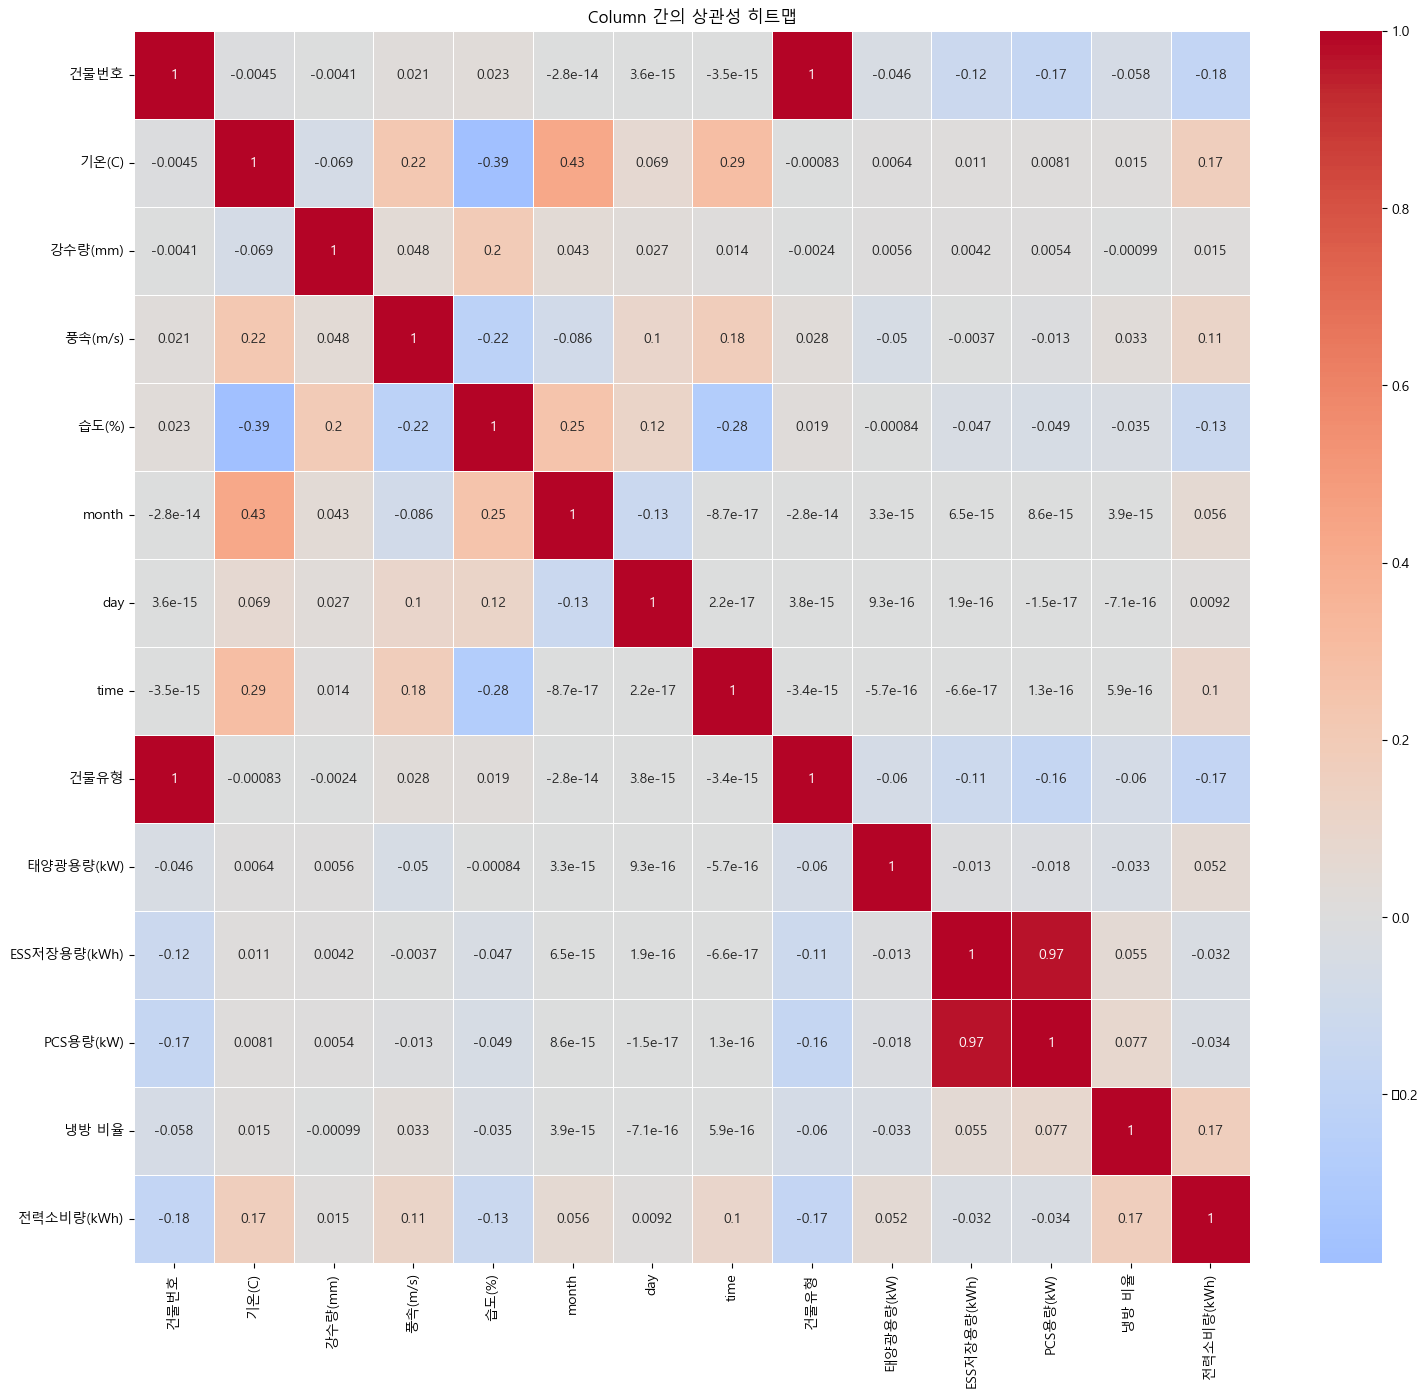

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

corr_matrix = train_df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.rc('font', family='Malgun Gothic')
plt.title("Column 간의 상관성 히트맵")
plt.show()

In [51]:
train_df = train_df.drop(['건물유형','PCS용량(kW)'], axis = 1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204000 entries, 2022-06-01 00:00:00 to 2022-08-24 23:00:00
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   건물번호          204000 non-null  int64  
 1   기온(C)         204000 non-null  float64
 2   강수량(mm)       204000 non-null  float64
 3   풍속(m/s)       204000 non-null  float64
 4   습도(%)         204000 non-null  float64
 5   month         204000 non-null  float64
 6   day           204000 non-null  float64
 7   time          204000 non-null  float64
 8   태양광용량(kW)     204000 non-null  float64
 9   ESS저장용량(kWh)  204000 non-null  float64
 10  냉방 비율         204000 non-null  float64
 11  전력소비량(kWh)    204000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 20.2 MB


In [52]:
test = pd.read_csv('test.csv')
test

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [54]:
test['month'] = test['일시'].apply(lambda x : float(x[4:6]))
test['day'] = test['일시'].apply(lambda x : float(x[6:8]))
test['time'] = test['일시'].apply(lambda x : float(x[9:11]))

test_df = test.drop(['num_date_time'], axis=1)
test_df = pd.merge(test_df, build, on = '건물번호')
test_df['일시'] = pd.to_datetime(test_df['일시'])
test_df = test_df.drop(['건물유형','PCS용량(kW)'], axis = 1)
test_df

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time,태양광용량(kW),ESS저장용량(kWh),냉방 비율
0,1,2022-08-25 00:00:00,23.5,0.0,2.2,72,8.0,25.0,0.0,0.0,0.0,0.357666
1,1,2022-08-25 01:00:00,23.0,0.0,0.9,72,8.0,25.0,1.0,0.0,0.0,0.357666
2,1,2022-08-25 02:00:00,22.7,0.0,1.5,75,8.0,25.0,2.0,0.0,0.0,0.357666
3,1,2022-08-25 03:00:00,22.1,0.0,1.3,78,8.0,25.0,3.0,0.0,0.0,0.357666
4,1,2022-08-25 04:00:00,21.8,0.0,1.0,77,8.0,25.0,4.0,0.0,0.0,0.357666
...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,2022-08-31 19:00:00,22.5,0.0,0.9,84,8.0,31.0,19.0,0.0,0.0,0.696291
16796,100,2022-08-31 20:00:00,20.7,0.0,0.4,95,8.0,31.0,20.0,0.0,0.0,0.696291
16797,100,2022-08-31 21:00:00,20.2,0.0,0.4,98,8.0,31.0,21.0,0.0,0.0,0.696291
16798,100,2022-08-31 22:00:00,20.1,0.0,1.1,97,8.0,31.0,22.0,0.0,0.0,0.696291
